# Creating the Neural Network

In [ ]:
import tensorflow as tf
from keras import backend as K

num_cores = 4

GPU = False
CPU = True

if GPU:
    num_GPU = 1
    num_CPU = 1
if CPU:
    num_CPU = 4
    num_GPU = 0

#config = tf.ConfigProto(intra_op_parallelism_threads=num_cores,
 #                       inter_op_parallelism_threads=num_cores, 
  #                      allow_soft_placement=True,
   #                     device_count = {'CPU' : num_CPU,
    #                                    'GPU' : num_GPU}
     #                  )

#session = tf.Session(config=config)
#K.set_session(session)

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Conv2D(32, kernel_size=3, activation='tanh'))
network.add(layers.MaxPooling2D((2,2)))
network.add(layers.Flatten())
network.add(layers.Dropout(0.5))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

train_images = train_images.reshape((60000, 28, 28, 1))
#train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
#test_images = test_images.astype('float32') / 255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
                             
network.fit(train_images, train_labels, epochs=3, batch_size=100, validation_data=(test_images, test_labels))

test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/3
600/600 [==============================] - 93s 149ms/step - loss: 0.5078 - accuracy: 0.8377 - val_loss: 0.1298 - val_accuracy: 0.9587
Epoch 2/3
600/600 [==============================] - 78s 131ms/step - loss: 0.1809 - accuracy: 0.9428 - val_loss: 0.0892 - val_accuracy: 0.9710
Epoch 3/3
313/313 [==============================] - 5s 16ms/step - loss: 0.0722 - accuracy: 0.9779
test_acc: 0.9779000282287598


# Testing that Neural Network Works

In [ ]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 100ms/step
[[1.04985113e-04 9.97524083e-01 1.38012365e-05 2.05249194e-06
  2.05105497e-03 4.20488817e-07 5.54719054e-06 1.45731814e-04
  1.14211914e-04 3.80419842e-05]
 [1.45170619e-04 6.20552601e-06 4.63293463e-06 2.98184113e-05
  9.65683103e-06 9.86543357e-01 4.15665051e-03 1.28964200e-06
  8.76342133e-03 3.39633378e-04]
 [1.88193473e-04 1.18334185e-06 2.01072021e-06 1.12767407e-06
  1.96585752e-05 1.05602305e-06 6.04021322e-09 9.99206007e-01
  3.31474394e-06 5.77476516e-04]]


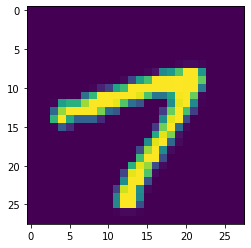

In [ ]:
print(network.predict(train_images[99:102]))
plt.imshow(train_images[101, :, :, 0])
plt.show()

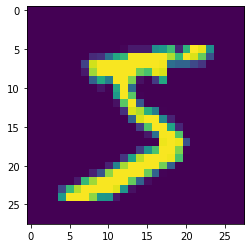

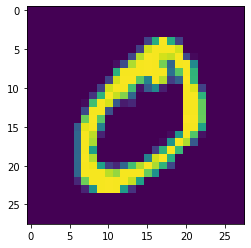

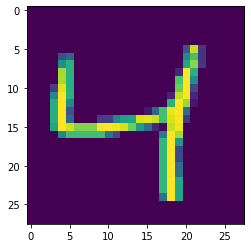

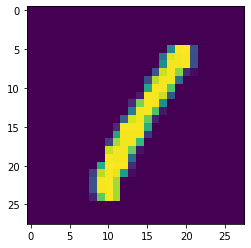

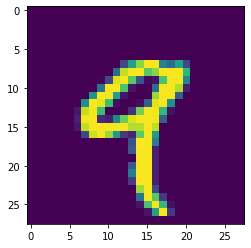

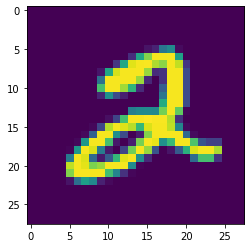

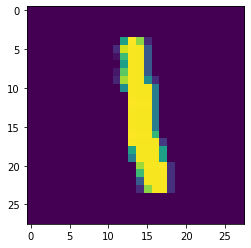

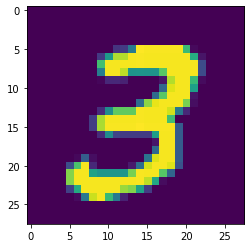

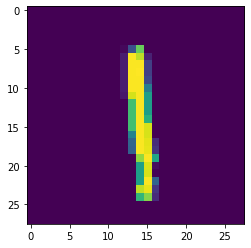

1/1 [==============================] - 0s 107ms/step
[[3.79305121e-08 1.07171175e-07 1.21803311e-07 2.42737252e-02
  1.93649932e-08 9.75627601e-01 3.00243386e-08 1.83261654e-05
  7.54776993e-05 4.42532883e-06]
 [9.99993622e-01 2.49851762e-09 6.23891538e-07 1.94616767e-08
  7.48738032e-08 2.29279600e-08 3.15001353e-06 3.31375851e-08
  4.98390250e-07 1.71289059e-06]
 [1.32355216e-09 1.44878777e-06 4.74058652e-07 4.78562072e-07
  9.99838591e-01 4.51360336e-08 3.37899020e-09 1.09643715e-05
  6.04951026e-07 1.47295214e-04]
 [5.41086993e-05 9.99595463e-01 1.49315229e-05 2.90827245e-07
  9.24712731e-05 3.90707342e-08 7.15326169e-05 3.70681155e-05
  1.30645640e-04 3.36583139e-06]
 [6.95188282e-06 4.82717587e-06 4.69725319e-06 1.48178879e-05
  2.66712182e-03 2.29845500e-06 6.07277784e-09 3.23795527e-03
  2.22908013e-04 9.93838429e-01]
 [2.48142032e-06 2.16153509e-07 9.99353349e-01 4.61007676e-06
  3.32344285e-07 5.20746912e-09 1.65802572e-09 1.01145979e-05
  6.27685338e-04 1.21497408e-06]
 [9.1

In [ ]:
for i in range(9):
    plt.imshow(train_images[i, :, :, 0])
    plt.show()
print(network.predict(train_images[:i+1]))

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


# Using Neural Network On User Generated Images From Paint

In [ ]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing

#import tensorflow-gpu

**Using Jupyter Notebok**

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1)

for i in range(10):
    image = (Image.open("AIPics/IMG_"+str(i+4588)+".JPG"))
    #image = rawimage.copy()
    image = ImageOps.invert(image)
    image = image.rotate(270)
    image = image.resize((28,28))
    image = image.convert(mode="L", matrix=None, dither=None, palette=0, colors=256)
    array = np.asarray(image, dtype=float)
    arrayboi = array.copy()
    #print(arrayboi.flags)
    #arrayboi.setflags(write=1)
    arrayboi = train_datagen.standardize(np.copy(arrayboi))
    for a in range(len(arrayboi[:])):
        for b in range(len(arrayboi[a])):
            if arrayboi[a,b] < 150:
                arrayboi[a,b] = 0
            else:
                arrayboi[a,b] = 255
    arrayboi = np.resize(arrayboi,(1,28,28,1))
    #print(arrayboi)
    print(network.predict(arrayboi))
    plt.imshow(arrayboi[0, :, :, 0], cmap="Greys")
    plt.show()

In [ ]:
for i in range(1):
    image = (Image.open("sevennn.png"))
    #image = rawimage.copy()
    image = ImageOps.invert(image)
    image = image.crop((0,0,712,950))
    image = image.resize((28,28))
    image = image.convert(mode="L", matrix=None, dither=None, palette=0, colors=256)
    array = np.asarray(image, dtype=float)
    arrayboi = array.copy()
    #print(arrayboi.flags)
    #arrayboi.setflags(write=1)
    arrayboi = train_datagen.standardize(np.copy(arrayboi))
    for a in range(len(arrayboi[:])):
        for b in range(len(arrayboi[a])):
            if arrayboi[a,b] < 110:
                arrayboi[a,b] = 0
            else:
                arrayboi[a,b] = 255
    arrayboi = np.resize(arrayboi,(1,28,28,1))
    #print(arrayboi)
    print(network.predict(arrayboi))
    plt.imshow(arrayboi[0, :, :, 0], cmap="Greys")
    plt.show()

**Using Google Colab**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


1/1 [==============================] - 0s 19ms/step
AI Prediction: 7


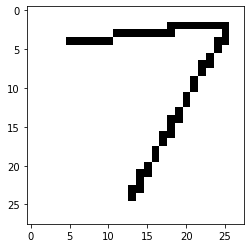

In [ ]:
train_datagen = preprocessing.image.ImageDataGenerator(rescale=1)

import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

for i in range(1):
    image = Image.open('/content/gdrive/My Drive/sevennn.png') #import image here
    #image = rawimage.copy()
    image = ImageOps.invert(image)
    image = image.convert(mode="L", matrix=None, dither=None, palette=0, colors=256)
    array = np.asarray(image, dtype=float)
    arrayboi = array.copy()
    #print(arrayboi.flags)
    #arrayboi.setflags(write=1)
    arrayboi = train_datagen.standardize(np.copy(arrayboi))
    for a in range(len(arrayboi[:])):
        for b in range(len(arrayboi[a])):
            if arrayboi[a,b] < 110:
                arrayboi[a,b] = 0
            else:
                arrayboi[a,b] = 255
    arrayboi = np.resize(arrayboi,(1,28,28,1))

    result = np.round(network.predict(arrayboi)) #get number result from image
    print("AI Prediction: " + str(np.argwhere(result==1.).sum()))

    plt.imshow(arrayboi[0, :, :, 0], cmap="Greys")
    plt.show()

--End of Necessary Code--